# Q2.1

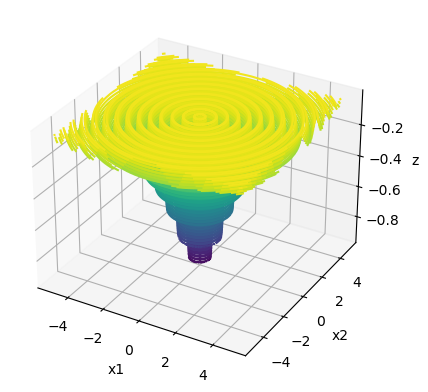

In [95]:
# Hw2 Q2.1 plot_dropwave_function
x1 = np.linspace(-5, 5, 200)
x2 = np.linspace(-5, 5, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = f2([X1, X2])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 50)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
plt.show()


In [118]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random

MAX_ITERATIONS = 100

def f1(curr):
    x, y = curr
    return np.add(np.square(x), np.square(y))

def f2(curr):
    x, y = curr
    sum_square = np.add(np.square(x), np.square(y))
    num = np.add(1, np.cos(np.multiply(12, np.sqrt(sum_square))))
    denom = np.add(np.multiply(0.5, sum_square), 2)
    return np.multiply(-1, np.divide(num, denom))

def f3(curr):
    return np.sum(np.square(curr))

def g1(curr):
    x, y = curr
    return np.add(np.multiply(2, x), np.multiply(2, y))

def g2(curr):
    x, y = curr
    sum_square = np.add(np.square(x), np.square(y))
    sqrt = np.sqrt(sum_square)
    a = np.multiply(-12, np.sin(np.multiply(12, sqrt)))
    b = np.add(np.multiply(0.5, sum_square), 2)
    c = np.add(1, np.cos(np.multiply(12, sqrt)))

    num1 = x * a * b - x * c * sqrt
    denom1 = np.multiply(np.square(b), sqrt)
    num2 = y * a * b - y * c * sqrt
    denom2 = np.multiply(np.square(b), sqrt)
    G1 = np.multiply(-1, np.divide(num1, denom1))
    G2 = np.multiply(-1, np.divide(num2, denom2))
    return np.array([G1, G2])


def g3(curr):
    return np.multiply(2, curr)

x1 = np.array([2., 2.])
x2 = np.array([2., 2.])
x3 = np.full((50, ), 2.)

# Q2.2

In [252]:
def gradient_descent(initial_x, initial_alpha, f, g, only_func_value=False):
    alpha = initial_alpha
    iterations = []
    function_values = []
    x = initial_x
    for i in range(MAX_ITERATIONS):
        iterations.append(i)
        function_values.append(f(x))
        gradient = g(x)
        if (np.sum(gradient) == 0):
            break
        diff = np.multiply(-1, np.multiply(alpha, gradient))
        x = x + diff
    if not only_func_value:
        plt.plot(iterations, function_values)
        plt.ylabel('f(x)')
        plt.xlabel('iterations')
        plt.show()
    else:
        return function_values

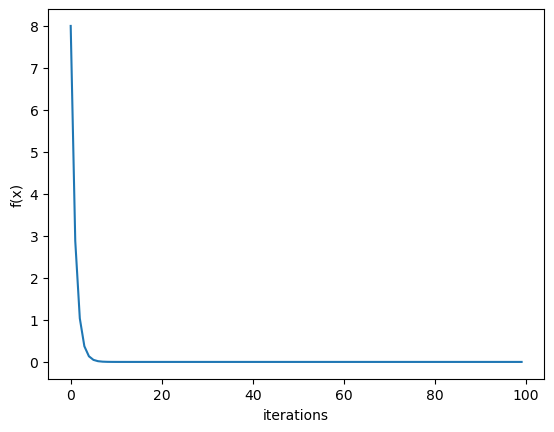

In [236]:
#Q2.2, function1 gradient descent
alpha = 0.1
gradient_descent(x1, alpha, f1, g1)

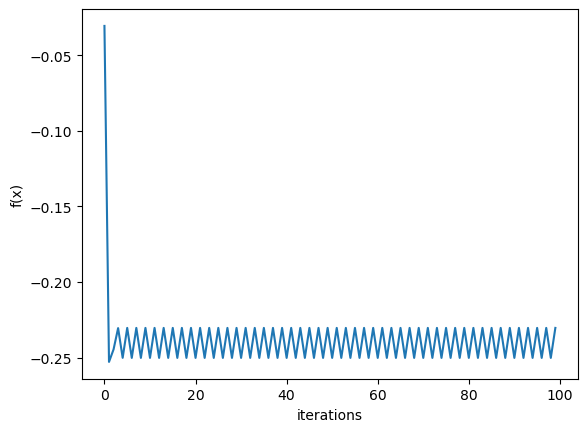

In [237]:
#Q2.2, function2 gradient descent
alpha = 0.1
gradient_descent(x2, alpha, f2, g2)

In [238]:
#Q2.2, function3 gradient descent
alpha = 0.1
gradient_descent(x3, alpha, f3, g3)

# Q2.3

In [233]:
def simulated_annealing(initial_x, f, cov, temperatures, seeds, only_func_value=False):
    collect = []
    for t in temperatures:
        temperature = t
        function_values = {}
        x_values = {}
        for s in seeds:
            np.random.seed(s)
            function_values[s] = []
            x = initial_x
            prev = f(x)
            for i in range(MAX_ITERATIONS):
                function_values[s].append(prev)
                next_x = np.random.multivariate_normal(x, cov)
                curr = f(next_x)
                if (curr >= prev):
                    T = temperature / float(i+1)
                    prob = np.exp((prev - curr) / T)
                    keep = np.random.random()
                    if (keep < prob):
                        x = next_x
                        prev = curr
                else:
                    x = next_x
                    prev = curr
            x_values[s] = x
        iterations = [i for i in range(MAX_ITERATIONS)]
        if not only_func_value:
            for k in function_values:
                plt.plot(iterations, function_values[k], label='seed='+str(k))
            plt.legend()
            plt.ylabel(f'f(x) with Temperature: {t}')
            plt.xlabel('iterations')
            plt.show()
        else:
            collect.append(function_values)
    if only_func_value:
        return collect

In [144]:
cov1 = np.identity(2)
cov2 = np.identity(2)
cov3 = np.identity(50)
temperatures = [10, 1000]
seeds = [0, 1, 2, 3, 4]

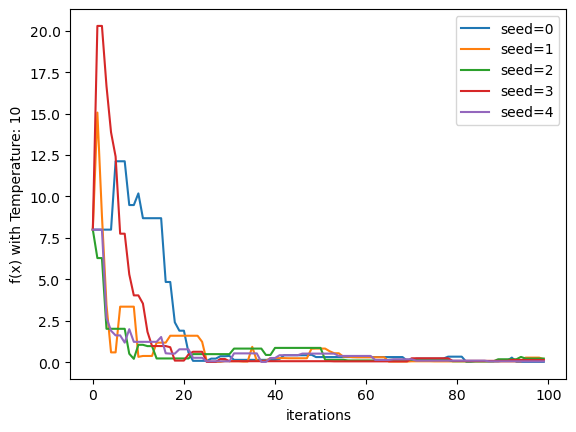

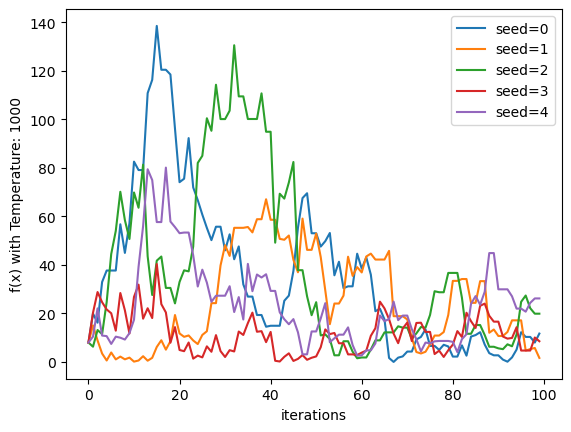

In [145]:
simulated_annealing(x1, f1, cov1, temperatures, seeds)

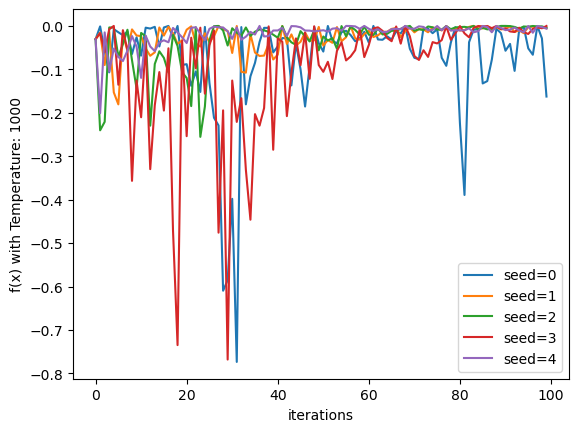

In [146]:
simulated_annealing(x2, f2, cov2, temperatures, seeds)

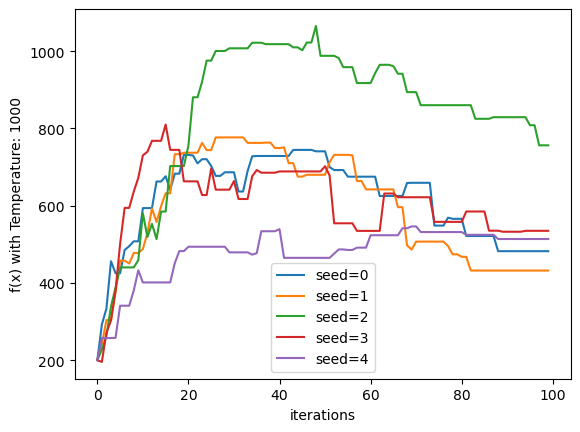

In [147]:
simulated_annealing(x3, f3, cov3, temperatures, seeds)

# Q2.4

In [202]:
def loop(seed, mean, cov, f, k):
    np.random.seed(seed)
    fvalues = []
    for i in range(MAX_ITERATIONS):
        samples = np.random.multivariate_normal(mean, cov, k)
        samples_fvalues = []
        curr_fvalues = []
        for j in range(k):
            fn = f(samples[j])
            samples_fvalues.append((fn, samples[j]))
            curr_fvalues.append(fn)
        samples_sorted = sorted(samples_fvalues, key=lambda g: g[0])
        fvalues.append(np.mean(curr_fvalues))

        elitek = int(0.2 * k)
        top_samples = samples_sorted[:elitek]
        topx = np.array([m for (_,m) in top_samples])
    
        mean = np.mean(topx, axis=0)

        new_cov = np.zeros_like(cov)
        for i in topx:
            diff = np.expand_dims(np.subtract(i, mean), axis = 1)
            new_cov += np.matmul(diff, diff.T)
        cov = np.divide(new_cov, float(elitek))
    return fvalues

def cross_entropy(initial_mean, f, initial_cov, elite, sample_sizes, seeds, only_func_value=False):
    collect = []
    for sa in sample_sizes:
        function_values = {}
        for s in seeds:
            fvalues = loop(s, initial_mean, initial_cov, f, sa)
            function_values[s] = fvalues
        iterations = [i for i in range(MAX_ITERATIONS)]
        if not only_func_value:
            for k in function_values:
                plt.plot(iterations, function_values[k], label='seed='+str(k))
            plt.legend()
            plt.ylabel(f'f(x) with sample size: {sa}')
            plt.xlabel('iterations')
            plt.show()
        else:
            collect.append(function_values)
            
    if only_func_value:
        return collect

In [203]:
cov1 = np.identity(2)
cov2 = np.identity(2)
cov3 = np.identity(50)
top_percent = 0.4
k = [10, 100]
seeds = [0, 1, 2, 3, 4]

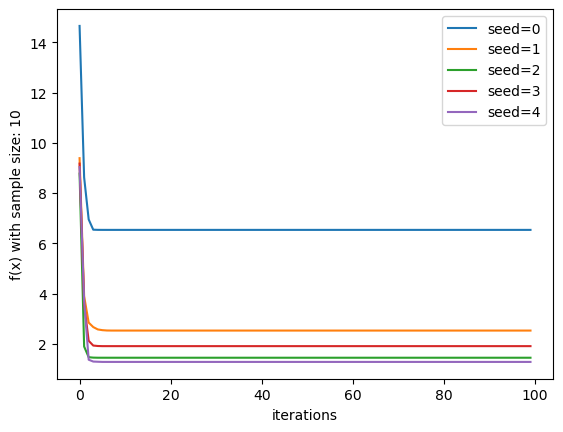

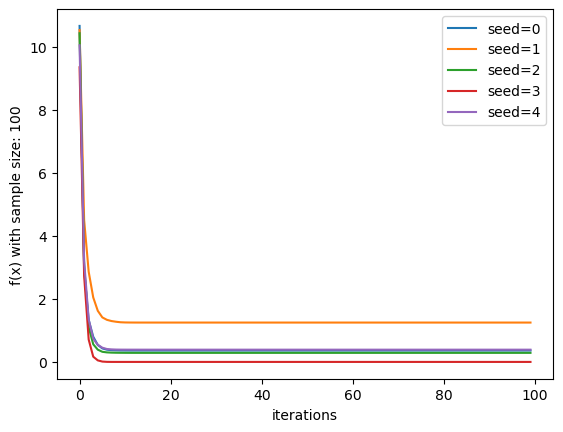

In [204]:
cross_entropy(x1, f1, cov1, top_percent, k, seeds)

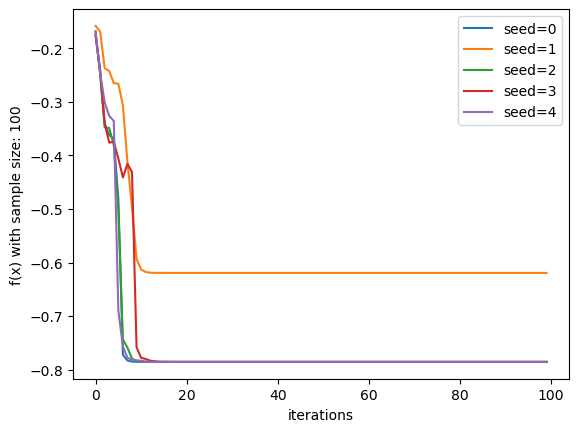

In [205]:
cross_entropy(x2, f2, cov2, top_percent, k, seeds)

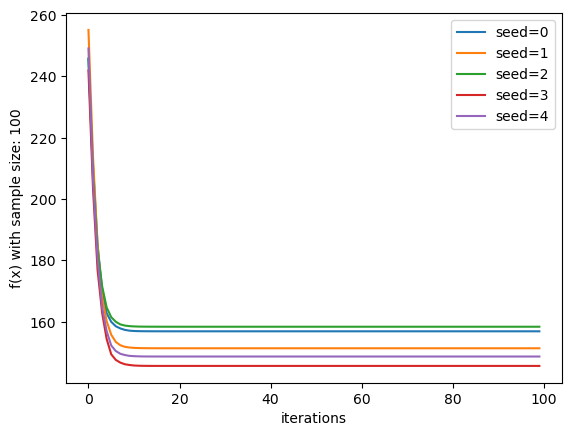

In [206]:
cross_entropy(x3, f3, cov3, top_percent, k, seeds)

# Q2.5

In [207]:
def gaussian_du(x, mean, cov):
    diff = np.subtract(x, mean)
    return np.matmul(np.linalg.inv(cov), diff)

def gaussian_ds(x, mean, cov):
    inv = np.linalg.inv(cov)
    diff = np.array([x - mean])
    inner = np.dot(diff.T, diff)
    return -0.5 * inv + 0.5 * np.matmul(np.matmul(inv, inner), inv) 

In [226]:
def search_gradient(initial_mean, f, initial_cov, lr, sample_sizes, seeds, only_func_value=False):
    collect = []
    for k in sample_sizes:
        function_values = {}
        x_values = {}
        for s in seeds:
            np.random.seed(s)
            function_values[s] = []
            mean = initial_mean
            cov = initial_cov
            for _ in range(MAX_ITERATIONS):
                fitness = []
                mean_log_likelihood = []
                cov_log_likelihood = []
                for _ in range(k):
                    curr_sample = np.random.multivariate_normal(mean, cov)
                    fn_value = f(curr_sample)
                    fitness.append(fn_value)
                    i_du = gaussian_du(curr_sample, mean, cov)
                    i_ds = gaussian_ds(curr_sample, mean, cov)
                    mean_log_likelihood.append(i_du)
                    cov_log_likelihood.append(i_ds)
                
                du = np.zeros_like(mean)
                ds = np.zeros_like(cov)
                for j in range(k):
                    du += mean_log_likelihood[j] * fitness[j]
                    ds += cov_log_likelihood[j] * fitness[j]
                du = du / k
                ds = ds / k  
                function_values[s].append(np.mean(fitness))         

                du_norm = du / np.linalg.norm(du)
                ds_norm = ds / np.linalg.norm(ds)
                mean = mean - lr * du_norm
                cov = cov - lr * ds_norm

            x_values[s] = mean
        iterations = [i for i in range(MAX_ITERATIONS)]
        if not only_func_value:
            for func in function_values:
                plt.plot(iterations, function_values[func], label='seed='+str(func))
            plt.legend()
            plt.ylabel(f'f(x) with sample size: {k}')
            plt.xlabel('iterations')
            plt.show()
        else:
            collect.append(function_values)
    if only_func_value:
        return collect

In [219]:
cov1 = np.identity(2)
cov2 = np.identity(2)
cov3 = np.identity(50)
k = [10, 100]
lr = 0.01
seeds = [0, 1, 2, 3, 4]

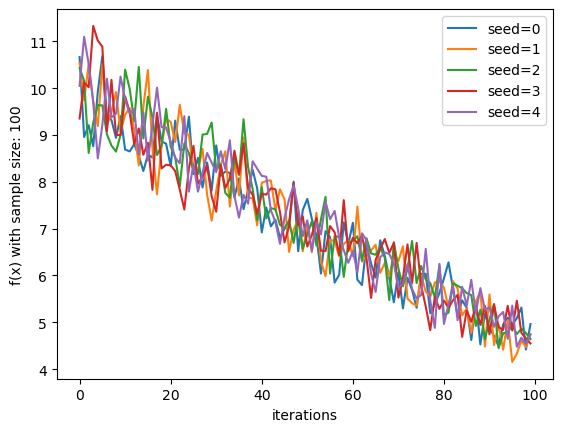

In [220]:
search_gradient(x1, f1, cov1, lr, k, seeds)

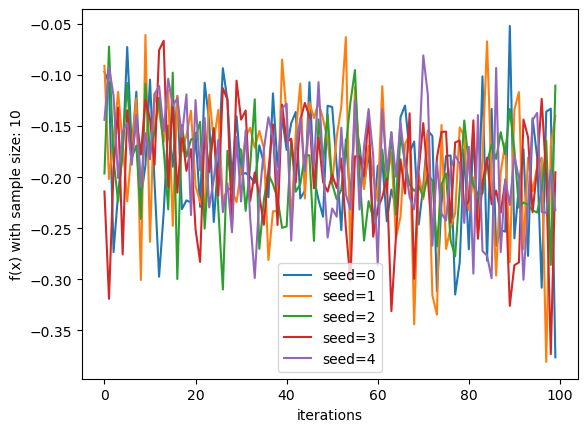

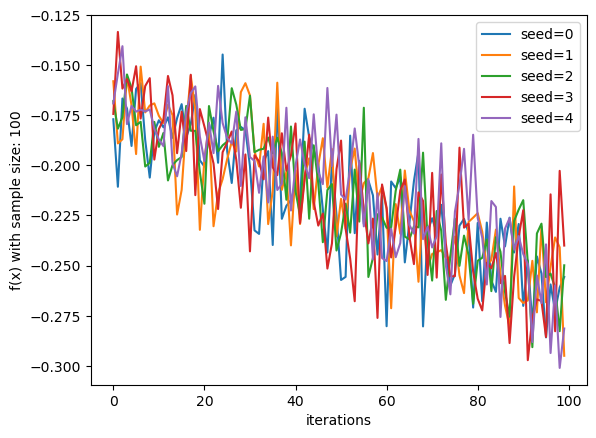

In [221]:
search_gradient(x2, f2, cov2, lr, k, seeds)

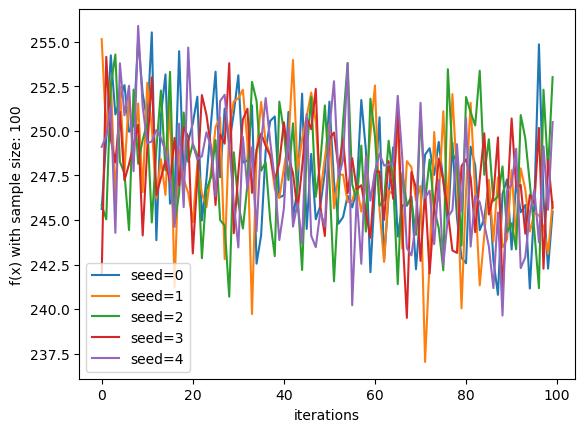

In [222]:
search_gradient(x3, f3, cov3, lr, k, seeds)

# Q2.6

In [217]:
# ce f1 2 sample size 10, 100, top 40% seed = 0
seeds = [0]
k =  [10, 100]
for i, function_values in enumerate(cross_entropy(x1, f1, cov1, top_percent, k, seeds, only_func_value=True)):
    for f in function_values:
        plt.plot([i for i in range(100)], function_values[f], label=f'sample size= {k[i]}')
plt.legend()
plt.ylabel(f'f(x) with sample size: {k}')
plt.xlabel('iterations')
plt.title('f1 with CE, top 40%, seed = 0, sample size 10 vs 100')
plt.show()
    

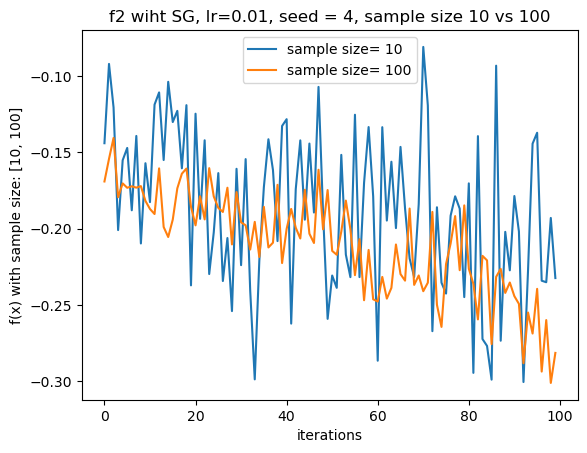

In [232]:
# f2 wiht SG, lr=0.01, seed = 4, sample size 10 vs 100
seeds = [4]
k =  [10, 100]
for i, function_values in enumerate(search_gradient(x2, f2, cov2, lr, k, seeds, only_func_value=True)):
    for f in function_values:
        plt.plot([i for i in range(100)], function_values[f], label=f'sample size= {k[i]}')
plt.legend()
plt.ylabel(f'f(x) with sample size: {k}')
plt.xlabel('iterations')
plt.title('f2 wiht SG, lr=0.01, seed = 4, sample size 10 vs 100')
plt.show()

In [234]:
# f2 wiht SA, seed = 4, Temperature 10 vs 1000
temperatures = [10, 1000]
seeds = [4]

for i, function_values in enumerate(simulated_annealing(x2, f2, cov2, temperatures, seeds, only_func_value=True)):
    for f in function_values:
        plt.plot([i for i in range(100)], function_values[f], label=f'temperature= {temperatures[i]}')
plt.legend()
plt.ylabel(f'f(x) with temperature: {temperatures}')
plt.xlabel('iterations')
plt.title('f2 wiht SA, seed = 4, Temperature 10 vs 1000')
plt.show()


In [255]:
k = [100]
seeds = [4]
methods = ['CE','SA','SG']
func_values_gd = gradient_descent(x3, alpha, f3, g3, only_func_value=True)
plt.plot([i for i in range(100)], func_values_gd, label='GD')

   
func_value_ce = cross_entropy(x3, f3, cov3, top_percent, k, seeds, only_func_value=True)
func_value_sa = simulated_annealing(x3, f3, cov3, [1000], seeds, only_func_value=True)
func_value_sg = search_gradient(x3, f3, cov3, lr, k, seeds, only_func_value=True)

all_function_values =  func_value_ce + func_value_sa + func_value_sg 

for i, function_values in enumerate(all_function_values):
    for f in function_values:
        plt.plot([i for i in range(100)], function_values[f], label=methods[i])
plt.legend()
plt.ylabel(f'f(x) with methods: {["GD"] + methods}')
plt.xlabel('iterations')
plt.title('f3 wiht GD vs CE vs SA vs SG')
plt.show()

# Q5

In [74]:
# Q5
def is_even(num):
    return num%2 == 0

def max_even_else_max(lst):
    res = max(lst)
    for num in lst:
        if is_even(num) and (not is_even(res) or num > res):
            res = num
    return res
       
 

In [175]:
def evenmax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth,option=None):
 
    # base case : targetDepth reached
    if (curDepth == targetDepth):
        if maxTurn: return scores[nodeIndex]
        else: return [scores[nodeIndex]]
     
    if (maxTurn):
        res = evenmax(curDepth + 1, nodeIndex * 2, False, scores, targetDepth)+ \
              evenmax(curDepth + 1, nodeIndex * 2 + 1, False, scores, targetDepth)
        if curDepth == 0 or option == 'max':
            return max(res)
        else:
            return max_even_else_max(res)
            
     
    else:
        left_1 = evenmax(curDepth + 1, nodeIndex * 2, True, scores, targetDepth, 'even') 
        left_2 = evenmax(curDepth + 1, nodeIndex * 2, True, scores, targetDepth, 'max')
        
        right_1 = evenmax(curDepth + 1, nodeIndex * 2 + 1, True, scores, targetDepth, 'even')
        right_2 = evenmax(curDepth + 1, nodeIndex * 2 + 1, True, scores, targetDepth, 'max')
        
        if curDepth == 0:
            res = max_even_else_max([left_1,right_1,left_2,right_2])
            if is_even(res): return res 
            else: return min(left_1,right_1,left_2,right_2)

        if left_1 == left_2 and right_1 == right_2:
            left, right = left_1,right_1
            if is_even(left) and is_even(right):
                 return [max(left, right)]
            elif not(is_even(left) or is_even(right)):
                return [min(left, right)]
            else:
                return [left] if is_even(left) else [right]
            
        elif left_1 == left_2: 
            if is_even(left_1):
                return [max(left_1,right_1)]
            else:
                return [min(left_2,right_2),right_1]
        elif right_1 == right_2:
            if is_even(right_1):
                return [max(left_1,right_1)]
            else:
                return[min(left_2,right_2),left_1]
        else: return [min(left_2,right_2),max(left_1,right_1)]
     
    
scores = [7,9,18,22,30,11,8,13]
#scores = [1,2,3,4,5,6,7,8]
treeDepth = math.floor(math.log(len(scores), 2))
print("The optimal value is : ", end = "")
print(evenmax(0, 0, False, scores, treeDepth))
 

The optimal value is : 30
